In [1]:
%matplotlib inline

# importing libraries
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import cufflinks as cf
import seaborn as sns
import pandas as pd
import numpy as np
import quandl
import plotly
import time

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.display import Markdown, display
from matplotlib.ticker import FuncFormatter
from pandas.core.base import PandasObject
from datetime import datetime

# Setting pandas dataframe display options
pd.set_option("display.max_rows", 20)
pd.set_option('display.width', 800)
pd.set_option('max_colwidth', 800)

# Set plotly offline
init_notebook_mode(connected=True)

# Set matplotlib style
plt.style.use('seaborn')

# Set cufflinks offline
cf.go_offline()

# Defining today's Date
from datetime import date
today = date.today()
import PortfolioAnalyser as pa

[<img style="float: right;" src="https://www.futureproof.pt/files/f_photos/f_shares/logo-future-proof_smaller.png" alt="FP" border="0">](https://www.futureproof.pt/)

In [2]:
# read excel
world_g = pd.read_excel('World_Growth.xlsx', skiprows=[0, 1, 2, 3, 4, 5]).dropna()

# Convert the date column to datetime64
world_g.Date = pd.to_datetime(world_g.Date)

# Set date column as index
world_g.set_index('Date', inplace=True)

# Set column name
world_g.columns = ['World_G']

In [3]:
# read excel
world_v = pd.read_excel('World_Value.xlsx', skiprows=[0, 1, 2, 3, 4, 5]).dropna()

# Convert the date column to datetime64
world_v.Date = pd.to_datetime(world_v.Date)

# Set date column as index
world_v.set_index('Date', inplace=True)

# Set column name
world_v.columns = ['World_V']

In [4]:
# read excel
world = pd.read_excel('World.xlsx', skiprows=[0, 1, 2, 3, 4, 5]).dropna()

# Convert the date column to datetime64
world.Date = pd.to_datetime(world.Date)

# Set date column as index
world.set_index('Date', inplace=True)

# Set column name
world.columns = ['World_B']

In [5]:
fundos = pa.merge_time_series(world_g, world_v)
fundos = pa.merge_time_series(fundos, world)

In [6]:
fundos = pa.normalize(fundos)

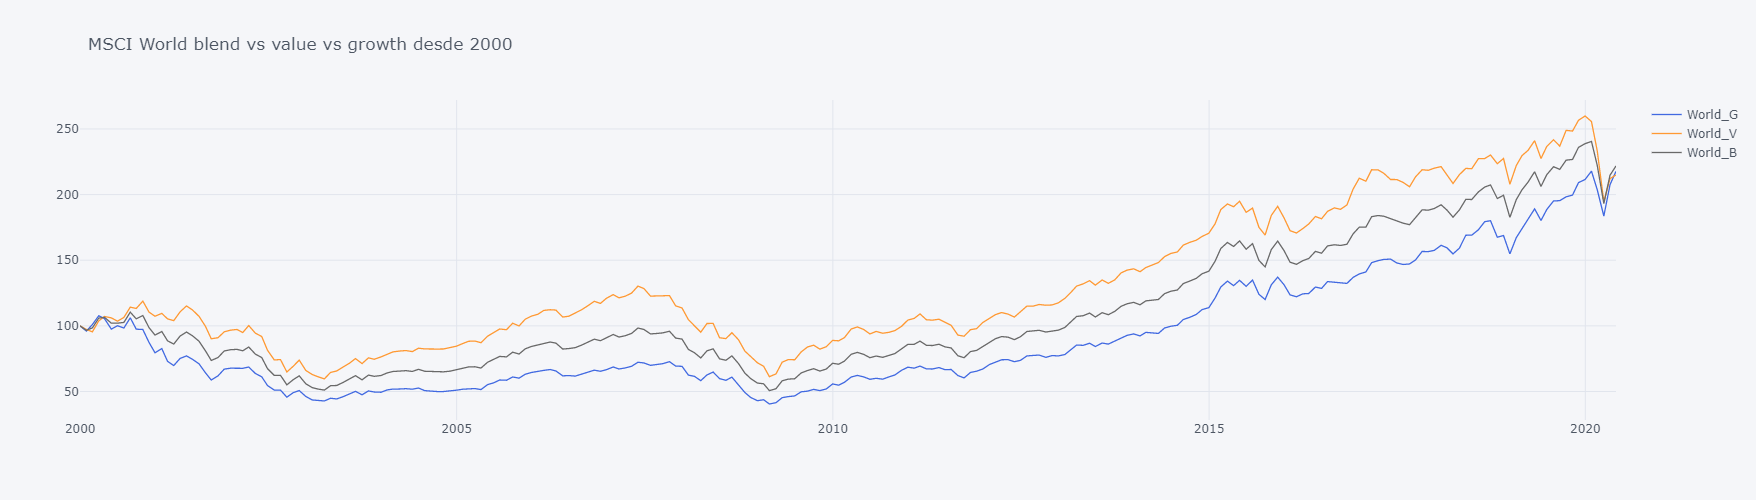

In [7]:
fundos.iplot(dimensions=pa.dimensions, title='MSCI World blend vs value vs growth desde 2000', color=['royalblue', 'orange', 'dimgrey'])

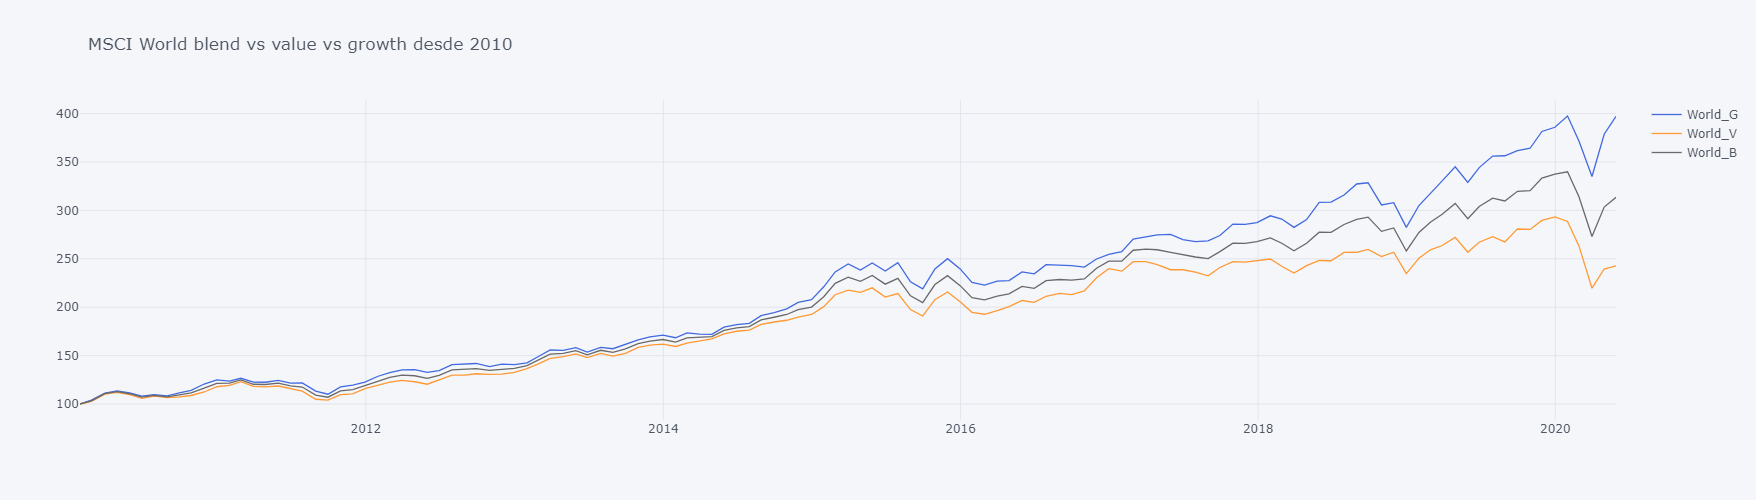

In [8]:
fundos_2010 = fundos.loc['2010':]
fundos_2010 = pa.normalize(fundos_2010)

fundos_2010.iplot(dimensions=pa.dimensions, title='MSCI World blend vs value vs growth desde 2010', color=['royalblue', 'orange', 'dimgrey'])

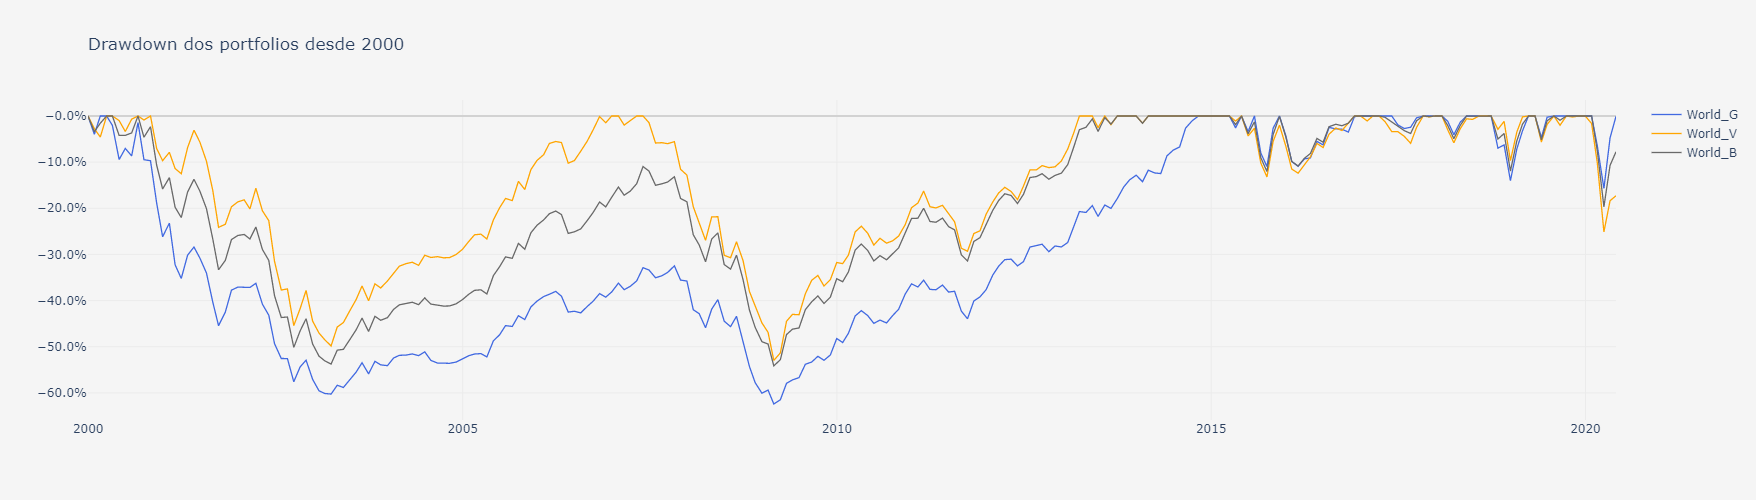

In [9]:
DD = pa.compute_drawdowns(fundos)
DD = DD /100

layout = go.Layout(
    title='Drawdown dos portfolios desde 2000',
    plot_bgcolor='#f5f5f5',
    paper_bgcolor='#f5f5f5',
    width=990,
    height=500,
    xaxis=dict(
        title='',
        showgrid=True,
        gridcolor='#ebebeb',
        titlefont=dict(size=12),
    ),
    yaxis=dict(
        title='',
        showgrid=True,
        gridcolor='#ebebeb',
        zeroline=True, # Adicionar ou não a zero line
        zerolinecolor='#d2d2d2',
        tickformat=".1%" # tickformat=".2%" se quiseres mais casas decimais
    ))

trace0 = go.Scatter(
    x = DD.index,
    y = DD.iloc[:, 0],
    name = DD.columns.to_list()[0],
    line = dict(
        color = 'royalblue',
        width = 1.3)
)

trace1 = go.Scatter(
    x = DD.index,
    y = DD.iloc[:, 1],
    name = DD.columns.to_list()[1],
    line = dict(
        color = 'orange',
        width = 1.3)
)

trace2 = go.Scatter(
    x = DD.index,
    y = DD.iloc[:, 2],
    name = DD.columns.to_list()[2],
    line = dict(
        color = 'dimgrey',
        width = 1.3)
)

data = [trace0, trace1, trace2]
        
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

**Dica:** A interactividade dos gráficos da plotly permite:

    . Zoom (mantenham o clique e arrastem o cursor em simultâneo, em cima do gráfico);
    . Tem uma lista de opções que aparece se forem com o cursor ao canto superior direito;
    . Façam duplo clique no gráfico ou seleccionem a opção Autoscale/Reset Axes para voltar ao normal;
    . Alterem a opção de 'Compare data on hoover' para 'Show closest data on hoover' se vos for mais conveniente;
    . Se clicarem num nome na legenda esse fundo desaparece (clicando de novo ele volta a apetecer).

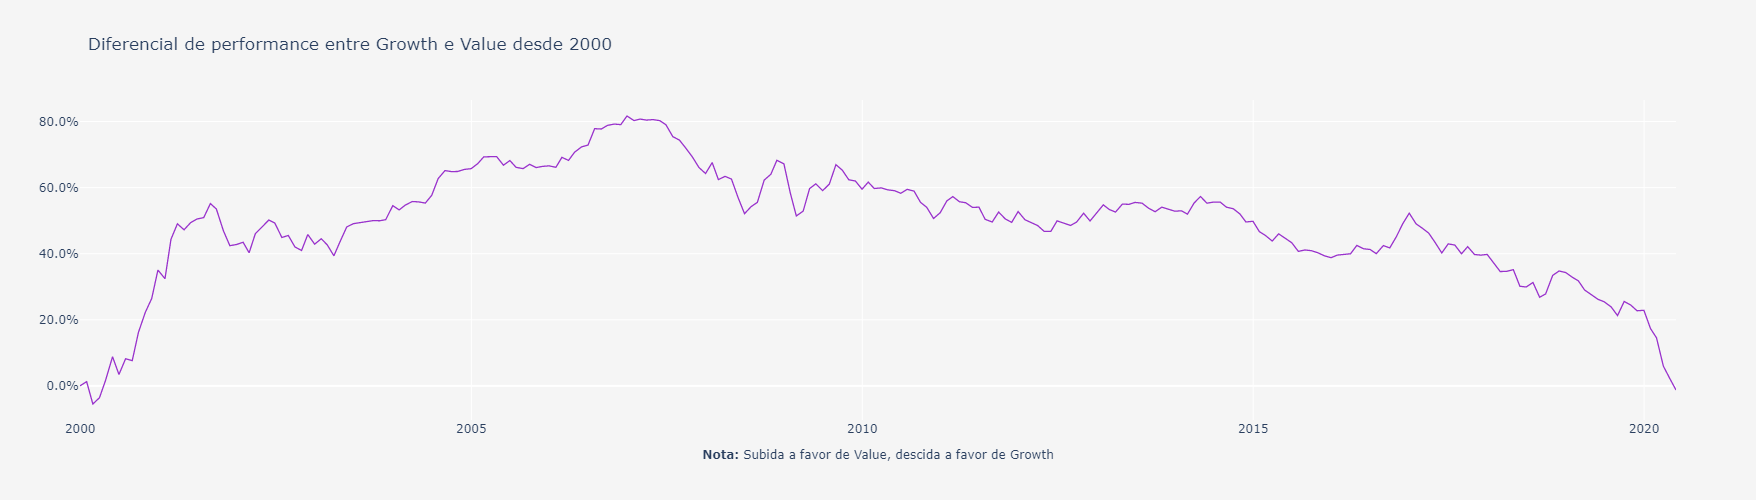

In [10]:
layout = go.Layout(
    title='Diferencial de performance entre Growth e Value desde 2000',
    plot_bgcolor='#f5f5f5',
    paper_bgcolor='#f5f5f5',
    width=990,
    height=500,
    xaxis=dict(
        title='<b>Nota:</b> Subida a favor de Value, descida a favor de Growth',
        showgrid=True,
        titlefont=dict(size=12),
    ),
    yaxis=dict(
        title='',
        showgrid=True,
        zeroline=True, # Adicionar ou não a zero line
        tickformat=".1%" # tickformat=".2%" se quiseres mais casas decimais
    ))

trace0 = go.Scatter(
    x = fundos.index,
    y = (round(((fundos.iloc[:, 1] / fundos.iloc[:, 0])- 1), 5)),
    name = 'Portfolio',
    line = dict(
        color = 'darkorchid',
        width = 1.3)
)

data = [trace0]
        
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Este gráfico apresenta a diferença relativa (ao invés da absoluta) entre o MSCI World Value e o MSCI World Growth.

In [11]:
pa.print_title('Performance dos fundos desde 2000')
pa.compute_performance_table(fundos, freq='months')

**Performance dos fundos desde 2000**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
World_G,3.88%,117.72%,14.89%,0.26,-62.41%,0.06
World_V,3.82%,114.95%,14.57%,0.26,-52.97%,0.07
World_B,3.98%,121.81%,14.26%,0.28,-54.15%,0.07


**Nota**: Por muito estranho que pareça de facto o blend é o que apresenta melhor performance desde 2000. Pode-se ir confirmar no gráfico de performance desde 2000 acima.

In [12]:
pa.print_title('Performance a 12 meses')
fundos_1 = pa.filter_by_date(fundos, years=1)
pa.compute_performance_table(fundos_1, freq='months')

**Performance a 12 meses**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
World_G,20.77%,20.76%,19.96%,1.04,-15.71%,1.32
World_V,-5.51%,-5.50%,23.36%,-0.24,-25.12%,-0.22
World_B,7.57%,7.56%,21.23%,0.36,-19.68%,0.38


In [13]:
pa.print_title('Performance a 3 anos')
fundos_3 = pa.filter_by_date(fundos, years=3)
pa.compute_performance_table(fundos_3, freq='months')

**Performance a 3 anos**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
World_G,13.02%,44.34%,15.72%,0.83,-15.71%,0.83
World_V,0.54%,1.64%,16.13%,0.03,-25.12%,0.02
World_B,6.89%,22.10%,15.48%,0.44,-19.68%,0.35


In [14]:
pa.print_title('Performance a 5 anos')
fundos_5 = pa.filter_by_date(fundos, years=5)
pa.compute_performance_table(fundos_5, freq='months')

**Performance a 5 anos**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
World_G,10.07%,61.67%,14.67%,0.69,-15.71%,0.64
World_V,1.98%,10.29%,15.00%,0.13,-25.12%,0.08
World_B,6.13%,34.66%,14.46%,0.42,-19.68%,0.31


In [15]:
pa.print_title('Performance a 10 anos')
fundos_10 = pa.filter_by_date(fundos, years=10)
pa.compute_performance_table(fundos_10, freq='months')

**Performance a 10 anos**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
World_G,13.55%,256.27%,12.35%,1.10,-15.71%,0.86
World_V,8.26%,121.14%,12.30%,0.67,-25.12%,0.33
World_B,10.98%,183.41%,12.00%,0.92,-19.68%,0.56


In [16]:
pa.print_title('Performance a 15 anos')
fundos_15 = pa.filter_by_date(fundos, years=15)
pa.compute_performance_table(fundos_15, freq='months')

**Performance a 15 anos**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
World_G,9.58%,294.21%,13.35%,0.72,-44.34%,0.22
World_V,5.81%,133.38%,13.72%,0.42,-52.97%,0.11
World_B,7.77%,207.03%,13.21%,0.59,-48.51%,0.16


In [17]:
pa.print_title('Performance a 20 anos')
fundos_20 = pa.filter_by_date(fundos, years=20)
pa.compute_performance_table(fundos_20, freq='months')

**Performance a 20 anos**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
World_G,4.10%,123.30%,14.80%,0.28,-61.87%,0.07
World_V,3.59%,102.63%,14.56%,0.25,-52.97%,0.07
World_B,3.96%,117.41%,14.25%,0.28,-54.15%,0.07


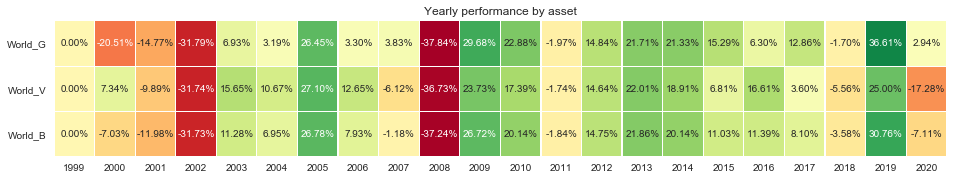

In [18]:
fundos_norm = fundos.copy()

# Resampling to yearly (business year)
yearly_quotes_fundos = fundos_norm.resample('BA').last()

# Adding first quote (only if start is in the middle of the year) ### Falta trabalho para automatizar #####
yearly_quotes_fundos = pd.concat([yearly_quotes_fundos.iloc[:1], yearly_quotes_fundos])
yearly_quotes_fundos = pd.concat([pd.DataFrame(fundos_norm.iloc[0]).transpose(), yearly_quotes_fundos.iloc[1:]])

# Returns
yearly_returns_fundos = ((yearly_quotes_fundos / yearly_quotes_fundos.shift(1)) - 1) * 100
yearly_returns_fundos = yearly_returns_fundos.set_index([list(range(fundos_norm.index[0].year - 1, fundos_norm.index[-1].year + 1))]).drop(fundos_norm.index[0].year - 1)

# Calcular em valores percentuais
yearly_returns_fundos = yearly_returns_fundos / 100

# Sns heatmap
fig, ax = plt.subplots()
fig.set_size_inches(16,2.5)

ax = sns.heatmap(yearly_returns_fundos.transpose(), annot=True, cmap="RdYlGn", linewidths=.2, cbar=False, center=0.02, fmt='.2%')
plt.yticks(rotation=360)
plt.title('Yearly performance by asset')
plt.show()

In [19]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Código ON/OFF</button>''', raw=True)

Código ON/OFF